In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Additional Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Input, Conv2D, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [4]:
# Load the dataset
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255, x_test / 255
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f"X_train: {x_train.shape}")
print(f"Y_train: {y_train.shape}")

170500096/170498071 [==============================] - 10s 0us/step
X_train: (50000, 32, 32, 3)
Y_train: (50000,)


In [5]:
# Number of classes
K = len(set(y_train))
print(f"Number of classes: {K}")

Number of classes: 10


In [6]:
# get the label dictionary
labels = '''airplane 
automobile 
bird 
cat 
deer 
dog 
frog 
horse 
ship 
truck'''
labels = {i: val for i, val in enumerate(labels.split(' \n'))}
labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

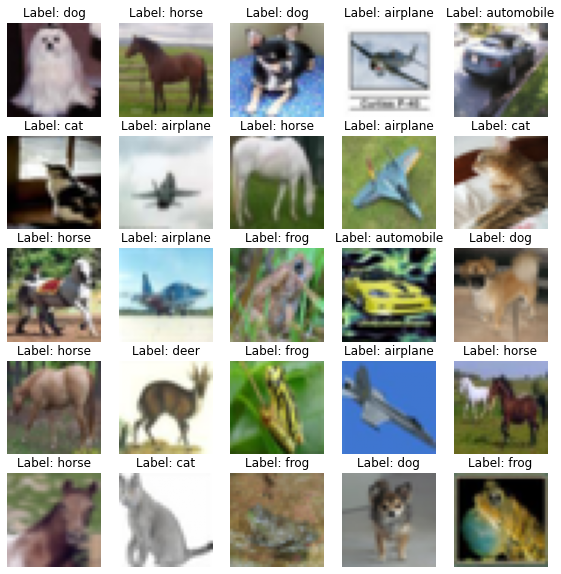

In [8]:
# See some training images along with the labels
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, rows * cols):
    idx = np.random.randint(x_train.shape[0])
    axes[i].imshow(x_train[idx])
    axes[i].set_title(f"Label: {labels[y_train[idx]]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=0)

In [48]:
# build the model
def build_model():
  # i = Input(shape=x_train[0].shape)
  # x = Conv2D(filters=32, kernel_size=(3, 3), strides=2, activation='relu')(i)
  # x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, activation='relu')(x)
  # x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation='relu')(x)
  # x = Flatten()(x)
  # x = Dropout(0.5)(x)
  # x = Dense(1024, activation='relu')(x)
  # x = Dropout(0.5)(x)
  # x = Dense(K, activation='softmax')(x)

  # Conv => BatchNorm => Conv => BatchNorm => MaxPool2D {32}
  i = Input(shape=x_train[0].shape)
  x = Conv2D(32, (3, 3), padding='same', activation='relu')(i)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  # x = Dropout(0.2)(x)
  # Conv => BatchNorm => Conv => BatchNorm => MaxPool2D {64}
  x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  # x = Dropout(0.2)(x)
  # Conv => BatchNorm => Conv => BatchNorm => MaxPool2D {128}
  x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  # x = Dropout(0.2)(x)

  # Dense => Dense(1024) => Softmax Layer(K)
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(K, activation='softmax')(x)

  return Model(i, x)

In [49]:
model = build_model()

In [50]:
# compile and fit the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

def fit(e=25):
  return model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=e)

def fit_with_data_augmentation(e=50):
  batch_size = 32
  data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
      width_shift_range=0.1, \
      height_shift_range=0.1, 
      horizontal_flip=True
  )
  train_generator = data_generator.flow(x_train, y_train, batch_size)
  steps_per_epoch = x_train.shape[0] // batch_size
  return model.fit_generator(train_generator, steps_per_epoch, epochs=e, validation_data=(x_test, y_test))

r = fit_with_data_augmentation()

Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.6091 - accuracy: 0.4458 - val_loss: 1.3146 - val_accuracy: 0.5307
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 1.1549 - accuracy: 0.5979 - val_loss: 1.1335 - val_accuracy: 0.6040
Epoch 3/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.9822 - accuracy: 0.6620 - val_loss: 0.8174 - val_accuracy: 0.7172
Epoch 4/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.8636 - accuracy: 0.7036 - val_loss: 0.9557 - val_accuracy: 0.7024
Epoch 5/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7830 - accuracy: 0.7340 - val_loss: 0.8337 - val_accuracy: 0.7322
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7197 - accuracy: 0.7555 - val_loss: 0.7058 - val_accuracy: 0.7648
Epoch 7/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.6698 - accuracy: 0.7759 - val_loss: 0.6171 -

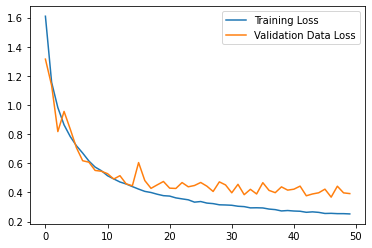

In [51]:
# plot the loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Data Loss')
plt.legend()

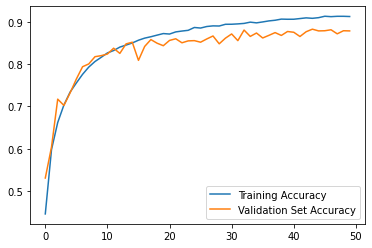

In [52]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Set Accuracy')
plt.legend()

In [53]:
p_test = model.predict(x_test).argmax(axis=1)

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(p_test, y_test)

In [55]:
import pandas as pd
import seaborn as sn
def plot_confusion_matrix(cm):
  df_cm = pd.DataFrame(
      cm, 
      index=[labels[i] for i in range(K)], 
      columns=[labels[i] for i in range(K)]
  )
  plt.figure(figsize = (15, 10))
  sn.heatmap(df_cm, annot=True)

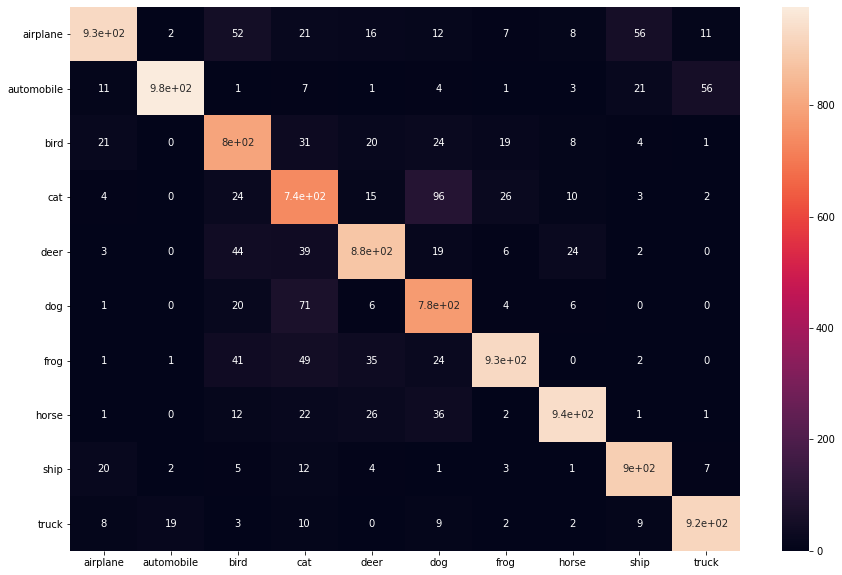

In [56]:
plot_confusion_matrix(cm)

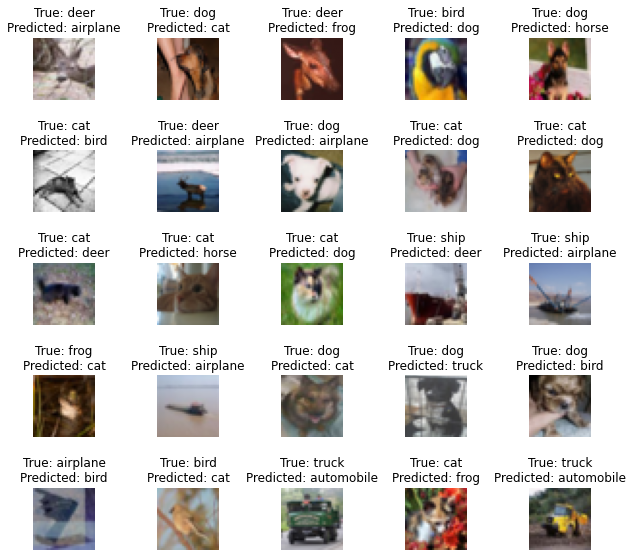

In [57]:
# Show some of the misclassified examples
misclassified_indices = np.where(p_test != y_test)[0]
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, rows * cols):
    idx = np.random.choice(misclassified_indices)
    axes[i].imshow(x_test[idx])
    axes[i].set_title(f"True: {labels[y_test[idx]]}\nPredicted: {labels[p_test[idx]]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)